# Ejercicio Python de Regresión Logística
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

## Cargamos los datos de entrada del archivo csv

In [2]:
dataframe = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [3]:
dataframe #clase -> 0 windwos, 1 linux y 2 mac 

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [4]:
dataframe.clase.value_counts() #tipos de sistemas operativos, datos sesgados para un sistema operativo. hay el doble de 1 que  de los otros dos 

0    86
2    44
1    40
Name: clase, dtype: int64

## Visualizamos los datos

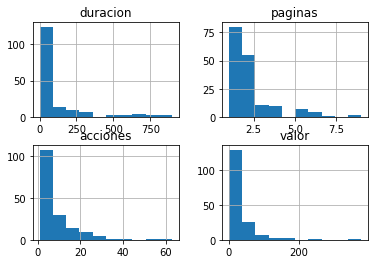

In [5]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

dataframe.drop(['clase'], 1).hist()
plt.show()

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


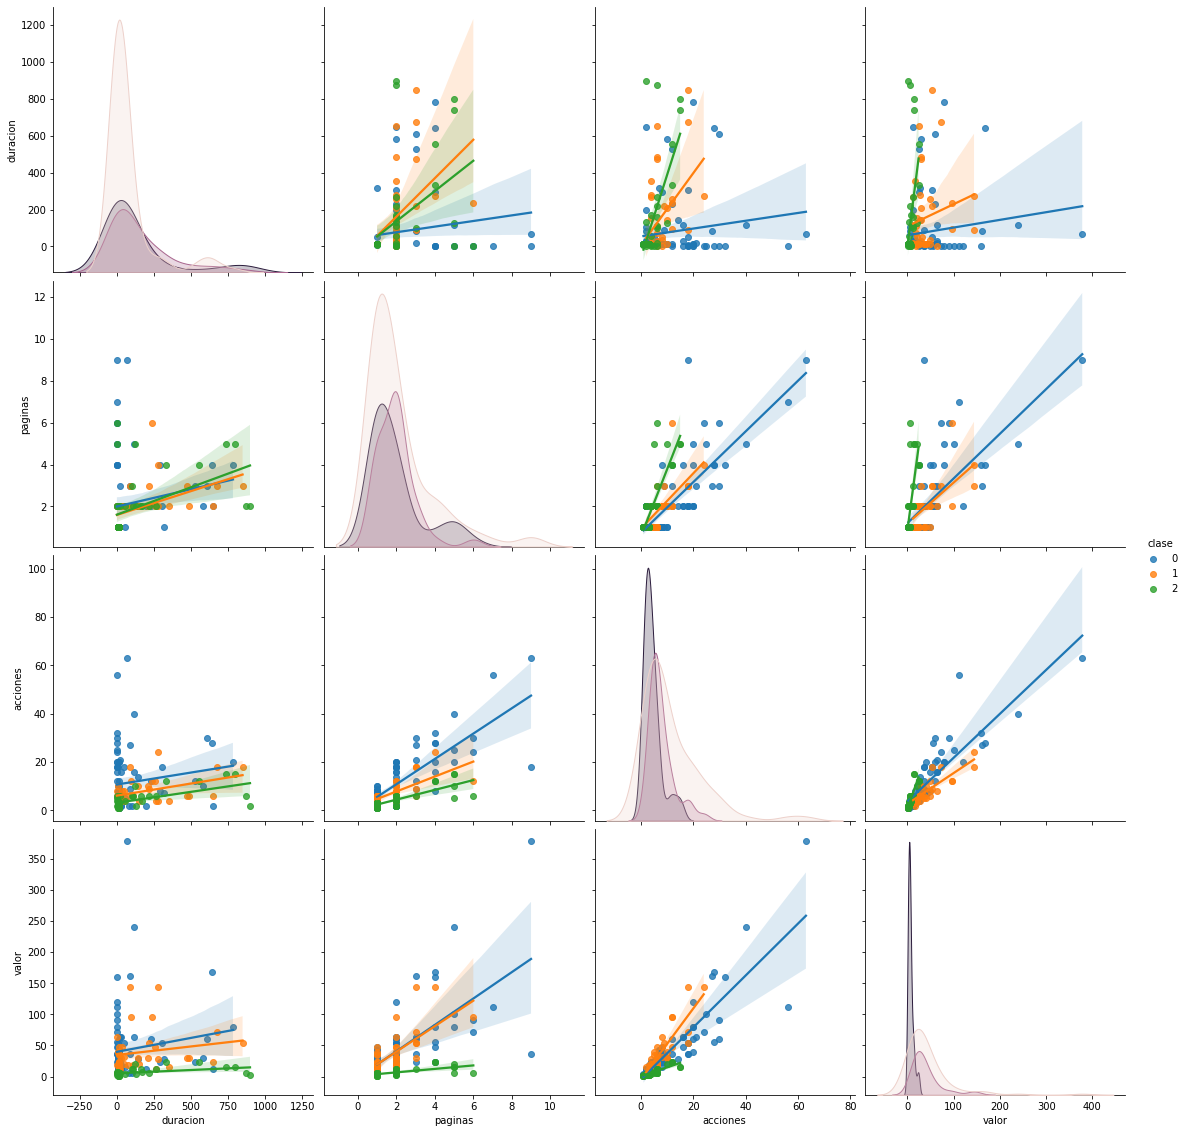

In [6]:
sb.pairplot(dataframe.dropna(), hue='clase',size=4,vars=["duracion", "paginas","acciones","valor"],kind='reg') # "reg" de regresión lineal

## Creamos el modelo

In [7]:
dataframe.drop(['clase'], 1) #visualiozar sin target de la columna

,duracion,paginas,acciones,valor
0,7.0,2,4,8
1,21.0,2,6,6
2,57.0,2,4,4
3,101.0,3,6,12
4,109.0,2,6,12
...,...,...,...,...
165,13.0,1,7,42
166,12.0,1,2,6
167,13.0,1,3,9
168,13.0,1,7,28


In [8]:
X = np.array(dataframe.drop(['clase'], axis=1)) #coger dataframe y transfrmarlo a array
y = np.array(dataframe['clase']) #y cogemos la columnna interesada -> y son las clases
print(y.shape)
X.shape

(170,)


(170, 4)

In [9]:
#model = linear_model.LogisticRegression(tol=0.75, C=9)
model = linear_model.LogisticRegression(max_iter=100) #parte de un modelo lineal el de regresion tb.  ESta notificacion te indica que no ha encontrado el minimo de los errores posibles. 
#max_iter por defecto esta a 100 te sale 
#si no encuentras el minimo global tienes que cambiar el max_iter (iteraciones totales)
model.fit(X,y) #se neceswita un test y un entrenamiento. con el fit busca ese minimo global -> esta es la sentencia que te devuelve el mensaje de warning
model.score(X,y) # me esta dando un 77,64% de aciertos xq he aumentado el max_iter
#hay que ir probando con las diferenets variables dentro de la formula con eol de 700 es mas generalista
#si cambio al 100 sale mas 
#si tengo mas variables las cambio va adar otros valores aqui ha llegado al 78,23% con 100 con el de 100 sale el warning 
#verbose da informacion de las iteraciones de los datos -> de lo que pasa co los datos 
#hay que gaurdar los modelos ya que cuando la bolita cae y empieza a investigar donde se enceuntra puede que caiga en el mejor sitio y por eso hay que guardar las variables con pickle se pueden guardar.

C:\Users\Administrator\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7823529411764706

In [10]:
y_pred = model.predict(X) #la prediccion de y con los datos de x, da 1 2 y 0 porque cuando le enseñe que los valores son 0 1 y 2  -> lo de gato hormiga y pajaro las predicciones que te da el programa
#dataframe.drop(['clase'], 1) #visualiozar sin target de la columna esta parte esta arriba
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 1
 0 1 1 1 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [11]:
model.score(X,y)#este score lo que hace llama a una funcion que usa y_pred para comparar con los resultados que tenemos 

0.7823529411764706

In [12]:
X_new = pd.DataFrame({'duracion': [7.0], 'paginas': [2], 'acciones': [4], 'valor': [8]})
X_new #nueva prediccion creamos un nuevo ejemplo

,duracion,paginas,acciones,valor
0,7.0,2,4,8


In [13]:
X_new.shape #la shape cuidado con la shape -1,1 o 1,1

(1, 4)

In [14]:
model.predict(X_new) #te dice de que clase es el ejemplo que hemos creado y podemos ver si lo acertamos o no dice que es de tipo 2 

array([2], dtype=int64)

## Adicional: Validación del Modelo

In [15]:
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape) #semilla 7 para hacer la vaolidacion, haces el test_size y luego haces el cross validation
X_test.shape

(136, 4)


(34, 4)

#### New update:

https://stackoverflow.com/questions/62658215/convergencewarning-lbfgs-failed-to-converge-status-1-stop-total-no-of-iter

Convergence

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [16]:
#resutlados del conjunto de validacion -> la valudacion cruzada entrena el modelo conla parte de train sin el validation y luego calcula el score de cada una de los splits que hayamos hecho por cada iteracion.abs
# itera x numero de veces entrena con la parte de train y con la parte de validacion saca el score
#al final calculas la desviacion tipica de todos, lo que se diferencia del a media .
# al final vamos a tener la media de todos los conjuntos de validacion y que tus datos tienen un mas o menos un porcentaje por cierto de desviacion tipica del vlaor de la media de los conjuntos de validacion
#calcula el % de acierto del modelo de entrenamiento y el porcentaje del conjunto de validacion. y uno va subiendo y el otro bajando, cuando el conjunto de entrenamiento baje y el de validacion suba, probablemente sea un sobreentrenamiento. por lo tanto se puede cambiar la semilla para ver si funciona con otra semilla
# el sobreeetrenamiento, ocurre una vez y ya despues sigue sucediendo.
# si para el siguiente entrenamiento el train baja y el de validacion sube en el caso anterior es un caso extraño, que hay un trozo que esta muy correcto para ese caso
#opciones que tenemos: 
# 1. Cambiar semilla. 
# 2. Tal vez haya columnas que no sean validas
# 3. añadir datos, añadir columnas etc. 

In [17]:
model = linear_model.LogisticRegression(max_iter=100)
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10, random_state=seed) #Parte los datos en 10 trozos para usar validación cruzada / cross validation n_splits particiones del conjunto del validacion, nos va a dar 10 resultados. para sklearn empezar haciendo el cross validation.
#semilla creada arriba 
#kfold es para partir los datos 
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
#le pasamos el cojunto de entrenamiento y sus target -> quremos el % de acierto en cada 
#le pasamos el kfold, el cross_val y una scoring que queramos. podemos decir solo un tipo de clase, ejemplo mac o la mas accuracy etc
#cross_val_score hace un model.fit -> coge trocitos y hace .fit en cada uno de lelos dandole un conjunto de entramientos xa cada uno de ellos.
#te muestra estos resultados.
#X_train, Y_train hay que darle los valores del conjunto de entrenamiento -> no le puedes dar todos los datos xq no tienes conjunto de test para testearlo
msg = "%s: %f %s (%f)" % (name, cv_results.mean(), "+-", cv_results.std()) #el primer numero sea el nombre, l amedia de todos los aciertos de crossvalidation, un string +- y luego la desvuacion tipica 
print(cv_results)
print("----------")
print(msg)
print("----------")
print("----------")
#1º print, los % del train cada uno de las particiones X-train Y_train <- por eso es del train
#2º print, el mensaje con el nombre, la media y la desviacion tipica 
#3º print,

ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [45]:
model.score(X_test, Y_test)#para entrenar el conjunto de test es del 85% frente al 77% de la parte de train. 

0.8529411764705882

In [46]:
X_test[0] #primera fila 

array([12.,  1.,  6., 48.])

In [47]:
Y_test[0] #esto es el valor que es 

1

In [48]:
model.predict(X_test[0:1])[0] #esto es para precedir el primer ejemplo del X_test y se comprueba que esta acertando el primer ejemplo con predit

1

In [49]:
model.predict_proba(X_test[0:1])[0] #para predecir la probabilidad de acierto -> le pasamos el primer valor del test que prob hay de que efectivamente lo que vaya a ser sea un 1. fiabilidad de una clase u otra
#la prediccion para las 3 clases

array([4.63458982e-01, 5.36541018e-01, 1.12881216e-27])

In [ ]:
#max(model.predict_proba(X_test[0:1])[0][0]
#max(model.predict_proba(X_test[0:1])[0][1]
#max(model.predict_proba(X_test[0:1])[0][2]
#asi las prob con cada uno de ellos es muy ineficiente xq el primer oes 49 el segundo 50 y pico y el tercero muy pequeño acierta de chiripa algunos 

In [50]:
max(model.predict_proba(X_test[0:1])[0]) 

0.5365410175660533

In [51]:
sum(model.predict_proba(X_test[0:1])[0])

1.0

In [52]:
predictions = model.predict(X_test)
print(model.score(X=X_test, y=Y_test))
print(accuracy_score(Y_test, predictions))#probabilidad xa el test

0.8529411764705882
0.8529411764705882


In [54]:
# Otra forma de calcular
acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


## Reporte de Resultados

In [55]:
Y_test.shape

(34,)

Diagonal principal = True positive

![](Confusion_matrix_multilabel.png)

In [56]:
print(confusion_matrix(Y_test, predictions)) #matriz de confusiones 16 numeros que ha acertado que eran 0 y ha dicho 0 la diagonal es asi 1 1 son 3 y 2 2 son 10 
#ha fallado 3 diciendo que era 0 siendo 1 
# eran 0 que se han dicho que se han dicho 2 

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


# Clasificación de nuevos registros

In [57]:
X_new = pd.DataFrame({'duracion': [10, 4], 'paginas': [3,10], 'acciones': [5,1], 'valor': [9,987]})
X_new

,duracion,paginas,acciones,valor
0,10,3,5,9
1,4,10,1,987


In [58]:
X_new.shape

(2, 4)

In [59]:
model.predict(X_new)

array([2, 1], dtype=int64)

In [ ]:
#1. limpiamos datos y creamos el dataframe
#2. particion de datos en test y train
#3. inicializamos el modelo con una serie de parametros. el kfold para partir los datos 
#4. Cross validation para ver si los datos casan bien con el modelo usado, puede ser cualquier modelo
#5. entrenamos el modelo con el train -> model.fit
# 6. no puede haber mucha diferencia entre el de test y train -> scores y se hace la prediccion de y sobre los valores de x 
#hago el score con las dos partes xa ver el score y la diferencia entre ambos, tienen que salir parecidos
